# 파이썬을 활용한 단순회귀분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

In [3]:
tips = sns.load_dataset('tips')

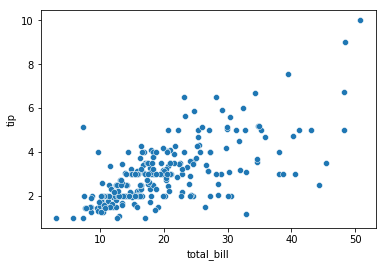

In [4]:
#EDA

sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

In [6]:
#상관계수 보기

tips.tip.corr(tips.total_bill)

0.6757341092113643

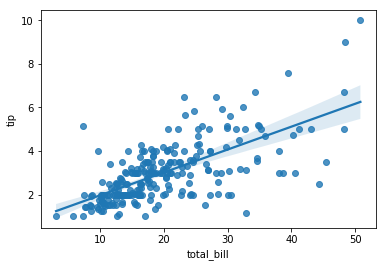

In [7]:
#회귀선 대강 구해보기

sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

In [8]:
#실제 회귀식 구해보기

m = smf.ols(formula = 'tip ~ total_bill', data=tips)
res = m.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.69e-34
Time:                        17:22:51   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.000       0.606       1.235
total_bill     0.1050      0.007     14.260      0.000       0.091       0.120
==============================================================================
Omnibus:                       20.185   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.750
Skew:                           0.443   Prob(JB):                     6.35e-09
Kurtosis:                       4.711   Cond. No.                         53.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- $\hat{tip} = 0.9203 + 0.0150 \times \text{total_bill}$
    - total_bill이 1 증가할 때, tip은 0.0150만큼 증가 
    - 결정계수 $R^2 = 0.457$ : 이 회귀식은 y의 변이 중 45.7%를 설명함 
    - 회귀계수의 유의성 검정 : p-value < $\alpha$ 이므로 $H_0$ 기각 $\rightarrow$ 회귀계수는 통계적으로 유의함 (즉, total_bill은 tip을 설명함)

## 이상치, 영향치의 이해 

In [9]:
import pandas as pd
ex1 = pd.read_table('data/influence1.txt')
ex2 = pd.read_table('data/influence2.txt')
ex3 = pd.read_table('data/influence3.txt')
ex4 = pd.read_table('data/influence4.txt')
ex1.head()

,Row,x,y
0,1,0.10000,-0.0716
1,2,0.45401,4.1673
2,3,1.09765,6.5703
3,4,1.27936,13.8150
4,5,2.20611,11.4501


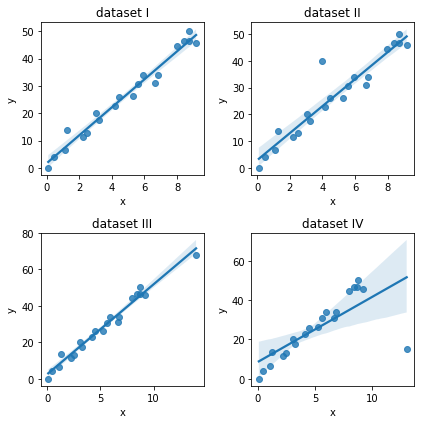

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(6, 6))

sns.regplot(x='x', y='y', data=ex1, ax=axs[0,0])
sns.regplot(x='x', y='y', data=ex2, ax=axs[0,1])
sns.regplot(x='x', y='y', data=ex3, ax=axs[1,0])
sns.regplot(x='x', y='y', data=ex4, ax=axs[1,1])

axs[0,0].set_title("dataset I")
axs[0,1].set_title("dataset II")
axs[1,0].set_title("dataset III")
axs[1,1].set_title("dataset IV")

fig.tight_layout() # 그래프들 간의 간격 띄우기 위함
plt.show()

In [ ]:
#data1 : 이상치와 영향치가 없는 자료
#data2 : 이상치 1개 존재 / 영향치 없음.
#data3 : 이상치는 없음 / 영향치 없음 / 그러나 레버리지포인트(1시방향) 존재
    #레버리지 포인트 : 이상치는 아니지만 다른 데이터셋과 떨어져 있어서 그 값에 따라 회귀식에 영향을 줄 수 있다.
#data4 : 이상치 존재 / 영향치 존재 : 이상치가 회귀식 방향과 반대되어 회귀식에 영향을 줄 수 있다.(영향치)